## k-NEAREST NEIGHBORS(kNN)

Arguably the simplest algorithm. For predictions, algo finds the closest data points in the training dataset.
Instead of considering only the closest neighbor, we can consider k- number of neighbors and use voting for predictions.

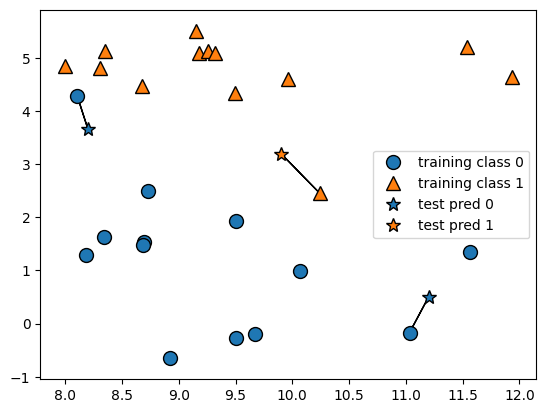

In [7]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=1)

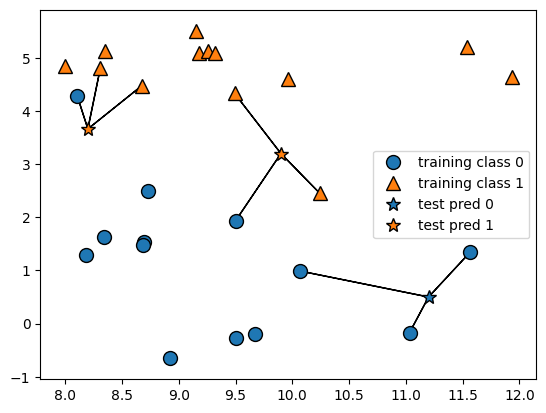

In [8]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=3)

## Appy k-Nearest Neighbors Algorithm Using Scikit-learn

In [9]:
from sklearn.model_selection import train_test_split
from mglearn.datasets import make_forge
from sklearn.neighbors import KNeighborsClassifier

X, y = make_forge()

# Split data into training and test et
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate classifier
clf = KNeighborsClassifier(n_neighbors=3)

# Fit classifier to training set
clf.fit(X_train, y_train)

# Make prediction on test data
print(f"Test set predictions: {clf.predict(X_test)}")

# Evaluate how well model generalizes
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


## Analyzing KNeighborsClassifier

The following code produces the
visualizations of the decision boundaries for one, three, and nine neighbors

Higher neighbors = Smoother *DECISION BOUNDARY* = Simpler model complexity

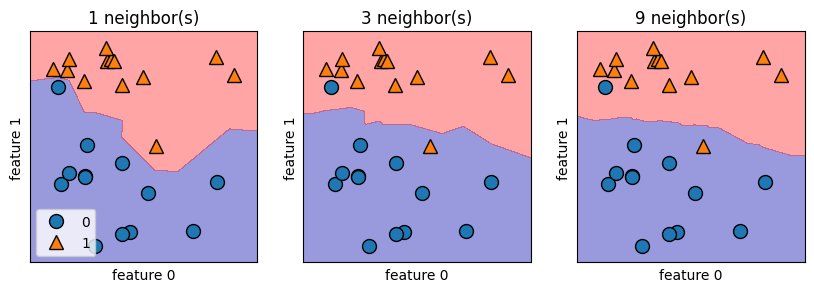

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)



## Model Complexity And Generalizatiion

Considering a single nearest
neighbor, the prediction on the training set is perfect. But when more
neighbors are considered, the model becomes simpler and the training
accuracy drops.

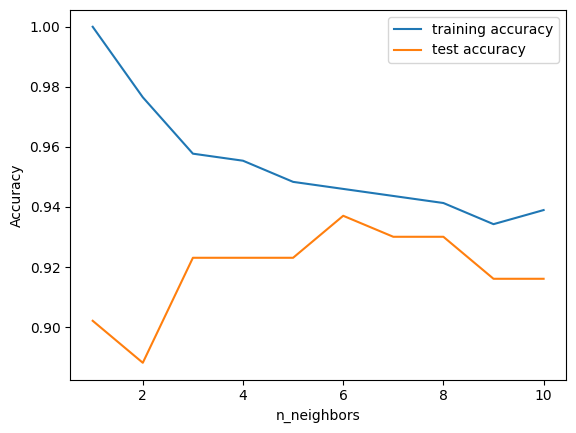

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))

    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()